In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("directory_to_the_csv_file", index_col=0)

In [ ]:
df.iloc[0:5,0:5]

,AAK1,AASS,AATK,ABAT,ABCA1
GSM338860,6.170397,5.606532,8.186989,7.100655,4.965535
GSM338861,6.112532,5.407005,8.530366,7.131207,4.912667
GSM338863,6.164055,5.518116,7.642412,7.221282,4.962869
GSM338865,6.423721,5.650853,8.372038,7.381892,4.956469
GSM338866,6.631895,5.701830,7.903833,7.641011,4.991327


### Split df to X and Class to y

In [ ]:
# Separate features and target
X = df.drop(columns = ['Class'])
y = df['Class']

## Feature Selection: Recursive Feature Elimination


In [ ]:
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.svm import SVC

In [ ]:
# Initialize an SVM classifier
svm = SVC(kernel="linear")

n_features_to_select = 200  # Adjust this to reduce to a manageable number of features
rfe = RFE(estimator=svm, n_features_to_select=n_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
rfe_selected_features = X.columns[rfe.support_]
X_rfe_selected = X[rfe_selected_features]

# Print the selected feature names
for feature in rfe_selected_features:
    print(feature)

ADAR
AMPD3
ANGPT1
APC2
APOBEC1
APOE
ARL4D
ARRDC1
ASTN1
ATP1A2
B2M
B4GALT6
BAG2
BCAT1
BDKRB1
BEX4
BLCAP
C1QC
C3AR1
CACNA1D
CALML3
CAMK4
CASP6
CBR3
CCL7
CD2
CD300A
CD47
CD52
CD55
CENPK
CENPT
CKB
CKS1B
CLCA1
COL19A1
CP
CRLF2
CRYAB
CSF2RA
CST3
CTNND2
CTSE
CTSF
CXCL9
CYP46A1
DAXX
DBNDD1
DCK
DDC
DDIT3
DYM
EFEMP1
EFHD2
EGR2
EIF2B1
EIF4E3
EMB
EN2
ENC1
ENPP5
ERMP1
FABP7
FEZF2
FGD4
FOXQ1
FRMD6
FST
FUCA1
GABRA3
GAD2
GAL
GALK1
GAP43
GDF9
GEM
GIMAP1
GPRC5B
GRIN1
GZMA
HBEGF
HES5
HEXB
HMOX1
HOMER1
HSD3B7
ID1
ID4
IER2
IER3
IFIT3
ILF3
IRF6
IRF9
ISG20
KALRN
KAZALD1
KCNH3
KIF11
KIF5C
KLF13
LARP6
LCP1
LGALS3BP
LHX9
LTBR
MAGI2
MEF2C
MEIS1
MEIS3
MIDN
MMP13
MX2
MXD3
MYO5B
NAB2
NCDN
NET1
NKAIN4
NPY1R
NR4A1
NR4A2
NRIP3
NTF3
NTRK3
PAK2
PBK
PBXIP1
PDIA6
PER2
PGS1
PHLDA1
PINK1
PLCB2
PLCB4
PLEKHB1
PLK2
PLK4
PLOD3
PNLIP
PPIC
PRKAR1B
PRKCD
PRKCH
PROX1
PTPN18
PTPN22
PTPRO
QDPR
RAB20
RFC1
RFC2
RGL2
RNF208
RPP14
RPS6KA2
S100B
SAMD4B
SCYL1
SDF2L1
SEMA6B
SEMA6D
SGCB
SHD
SLC15A2
SLC25A28
SLC30A3
SLC4A1
SLC5A6
SNCG
SP100
S

In [ ]:
X_selected = X_rfe_selected

### 80/20 Rule

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Baseline Model

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# Initial SVM
svm_model = SVC(kernel='rbf', C=1.0)  # You can choose 'linear', 'poly', 'rbf', etc. for the kernel
svm_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.6438356164383562
Train Accuracy: 0.7439446366782007


## Confusion Matrix

In [ ]:
unique_labels = y.unique()
print(unique_labels)

['OPNA' 'TBI' 'EEV']


In [ ]:
# Define the class names based on the identified mapping
class_names = ['OPNA', 'TBI', 'EEV']

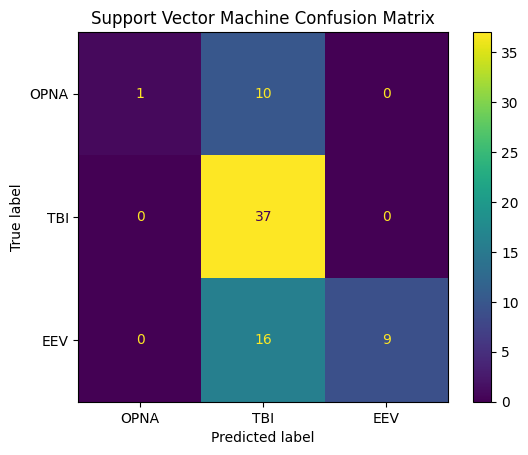

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.viridis)  # You can change the colormap if you prefer
plt.title("Support Vector Machine Confusion Matrix")
plt.show()